In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
df = pd.read_csv('BTC_Hourly_Six_Years.csv')

In [3]:
df

,close,high,low,open,timestamp,volume
0,4176.08,4177.63,4154.28,4162.04,1506729600,114.805325
1,4208.14,4224.60,4170.84,4170.84,1506733200,348.452795
2,4203.33,4217.56,4194.04,4207.58,1506736800,143.563557
3,4190.72,4206.94,4185.67,4206.89,1506740400,153.187721
4,4193.47,4206.59,4180.55,4185.73,1506744000,123.810199
...,...,...,...,...,...,...
52579,26918.00,26955.00,26892.00,26930.00,1696014000,57.433587
52580,26907.00,26973.00,26871.00,26920.00,1696017600,139.259314
52581,26875.00,26919.00,26871.00,26910.00,1696021200,32.825604
52582,26886.00,26915.00,26862.00,26875.00,1696024800,58.682014


In [6]:
# Get the date from the timestamp
df['datetime'] = df['timestamp'].apply(lambda x: datetime.datetime.utcfromtimestamp(x))
df

,close,high,low,open,timestamp,volume,datetime
0,4176.08,4177.63,4154.28,4162.04,1506729600,114.805325,2017-09-30 00:00:00
1,4208.14,4224.60,4170.84,4170.84,1506733200,348.452795,2017-09-30 01:00:00
2,4203.33,4217.56,4194.04,4207.58,1506736800,143.563557,2017-09-30 02:00:00
3,4190.72,4206.94,4185.67,4206.89,1506740400,153.187721,2017-09-30 03:00:00
4,4193.47,4206.59,4180.55,4185.73,1506744000,123.810199,2017-09-30 04:00:00
...,...,...,...,...,...,...,...
52579,26918.00,26955.00,26892.00,26930.00,1696014000,57.433587,2023-09-29 19:00:00
52580,26907.00,26973.00,26871.00,26920.00,1696017600,139.259314,2023-09-29 20:00:00
52581,26875.00,26919.00,26871.00,26910.00,1696021200,32.825604,2023-09-29 21:00:00
52582,26886.00,26915.00,26862.00,26875.00,1696024800,58.682014,2023-09-29 22:00:00


In [9]:
df.set_index('datetime', inplace=True)

In [10]:
df

,close,high,low,open,timestamp,volume
datetime,,,,,,
2017-09-30 00:00:00,4176.08,4177.63,4154.28,4162.04,1506729600,114.805325
2017-09-30 01:00:00,4208.14,4224.60,4170.84,4170.84,1506733200,348.452795
2017-09-30 02:00:00,4203.33,4217.56,4194.04,4207.58,1506736800,143.563557
2017-09-30 03:00:00,4190.72,4206.94,4185.67,4206.89,1506740400,153.187721
2017-09-30 04:00:00,4193.47,4206.59,4180.55,4185.73,1506744000,123.810199
...,...,...,...,...,...,...
2023-09-29 19:00:00,26918.00,26955.00,26892.00,26930.00,1696014000,57.433587
2023-09-29 20:00:00,26907.00,26973.00,26871.00,26920.00,1696017600,139.259314
2023-09-29 21:00:00,26875.00,26919.00,26871.00,26910.00,1696021200,32.825604


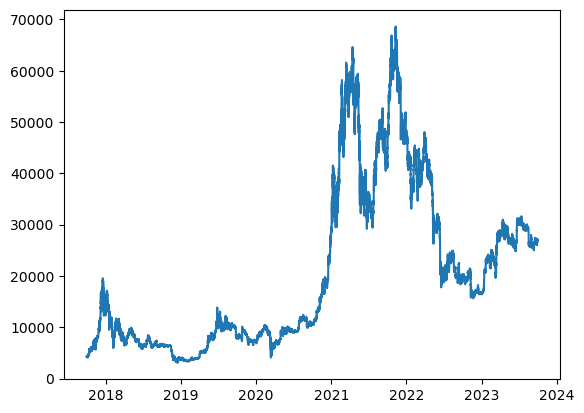

In [13]:
plt.plot(df['close'])

In [15]:
df1 = df.loc[:, [ 'close']]

In [16]:
df1

,close
datetime,
2017-09-30 00:00:00,4176.08
2017-09-30 01:00:00,4208.14
2017-09-30 02:00:00,4203.33
2017-09-30 03:00:00,4190.72
2017-09-30 04:00:00,4193.47
...,...
2023-09-29 19:00:00,26918.00
2023-09-29 20:00:00,26907.00
2023-09-29 21:00:00,26875.00


In [17]:
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df1)

In [18]:
pvalue

0.5086496730885429

In [28]:
# Make data stationary
df1_diff = df1.diff().dropna()
df1_diff

,close
datetime,
2017-09-30 01:00:00,32.06
2017-09-30 02:00:00,-4.81
2017-09-30 03:00:00,-12.61
2017-09-30 04:00:00,2.75
2017-09-30 05:00:00,31.48
...,...
2023-09-29 19:00:00,-2.00
2023-09-29 20:00:00,-11.00
2023-09-29 21:00:00,-32.00


<Figure size 1200x600 with 0 Axes>

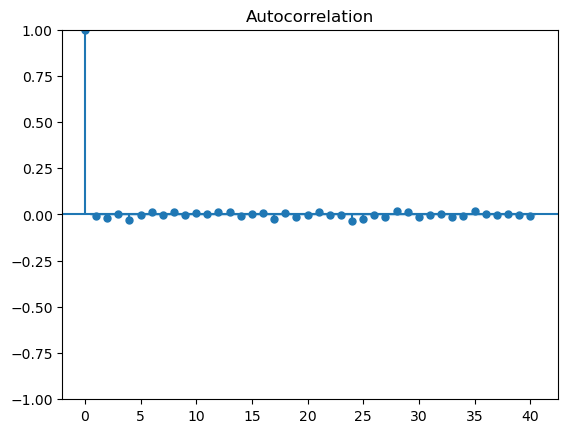

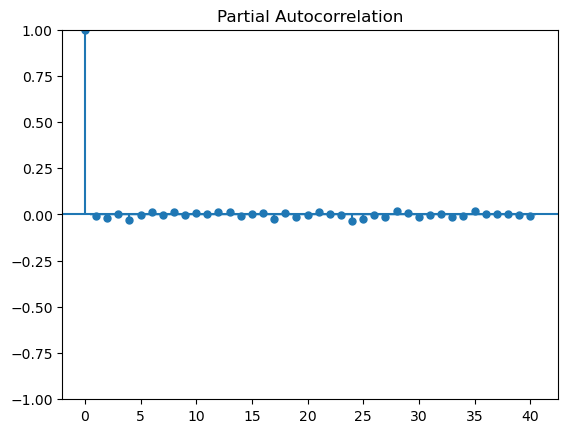

In [26]:
# Plot ACF and PACF plots to determine the order of ARIMA (p, d, q)
plt.figure(figsize=(12, 6))
plot_acf(df1_diff, lags=40)
plot_pacf(df1_diff, lags=40)
plt.show()

In [43]:
# Build and fit the ARIMA model
p, d, q = (1, 1, 1) # NEEDS WORK
model = ARIMA(df1, order=(p, d, q))
model_fit = model.fit()

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [50]:
# Make forecasts
forecast_period = 10  # Can be changed for more or less periods
forecast = model_fit.forecast(steps=forecast_period)

# Print the forecasts
print("ARIMA Forecasts:\n", forecast)

ARIMA Forecasts:
 2023-09-30 00:00:00    26910.684509
2023-09-30 01:00:00    26910.481278
2023-09-30 02:00:00    26910.350362
2023-09-30 03:00:00    26910.266029
2023-09-30 04:00:00    26910.211704
2023-09-30 05:00:00    26910.176710
2023-09-30 06:00:00    26910.154167
2023-09-30 07:00:00    26910.139646
2023-09-30 08:00:00    26910.130291
2023-09-30 09:00:00    26910.124265
Freq: H, Name: predicted_mean, dtype: float64
